In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.QED import qed
from rdkit.Chem.Crippen import MolLogP

IPythonConsole.ipython_useSVG=True 

In [4]:
import sys
from io import StringIO

In [5]:
import os.path


In [6]:
if not os.path.isfile("../data/processed/clearSmiles_test.csv") or not os.path.isfile("../data/processed/moses_test.csv") or not os.path.isfile("../data/processed/guacamol_test.csv") :
    dataset_moses  = pd.read_csv("../data/interim/moses.csv")
    dataset_guacamol  = pd.read_csv("../data/interim/guacamol.csv")
    clearSmiles_dataset = pd.read_csv("../data/raw/sampled_Clearsmiles_test.csv")


    dataset_moses_test= dataset_moses[dataset_moses["SPLIT"]== "test"]
    dataset_guacamol_test= dataset_guacamol[dataset_guacamol["SPLIT"]== "test"]

    dataset_moses_test["mol"]= dataset_moses_test["SMILES"].apply(Chem.MolFromSmiles)
    dataset_guacamol_test["mol"]=  dataset_guacamol_test["SMILES"].apply(Chem.MolFromSmiles)
    clearSmiles_dataset["mol"]=  clearSmiles_dataset["smiles"].apply(Chem.MolFromSmiles)

    dataset_moses_test["qed"] = dataset_moses_test["mol"].apply(qed)
    dataset_guacamol_test["qed"]=  dataset_guacamol_test["mol"].apply(qed)
    clearSmiles_dataset["qed"]=  clearSmiles_dataset["mol"].apply(qed)


    dataset_moses_test["logP"] = dataset_moses_test["mol"].apply(MolLogP)
    dataset_guacamol_test["logP"]=  dataset_guacamol_test["mol"].apply(MolLogP)
    clearSmiles_dataset["logP"]=  clearSmiles_dataset["mol"].apply(MolLogP)

    clearSmiles_dataset["inchie"] = clearSmiles_dataset["mol"].apply(Chem.MolToInchi)
    dataset_moses_test["inchie"] = dataset_moses_test["mol"].apply(Chem.MolToInchi)
    dataset_guacamol_test["inchie"]=  dataset_guacamol_test["mol"].apply(Chem.MolToInchi)

    clearSmiles_dataset.to_csv("../data/processed/clearSmiles_test.csv")
    dataset_moses_test.to_csv("../data/processed/moses_test.csv")
    dataset_guacamol_test.to_csv("../data/processed/moses_test.csv")

    #dataset_moses["mol"]= dataset_moses["SMILES"].apply(Chem.MolFromSmiles)
    #dataset_guacamol["mol"]=  dataset_guacamol["SMILES"].apply(Chem.MolFromSmiles)
    #dataset_moses["qed"] = dataset_moses["mol"].apply(qed)
    #dataset_guacamol["qed"]=  dataset_guacamol["mol"].apply(qed)
else :
    dataset_moses_test  = pd.read_csv("../data/processed/moses_test.csv")
    dataset_guacamol_test  = pd.read_csv("../data/processed/guacamol_test.csv")
    clearSmiles_dataset = pd.read_csv("../data/processed/clearSmiles_test.csv")

In [7]:
n = 500

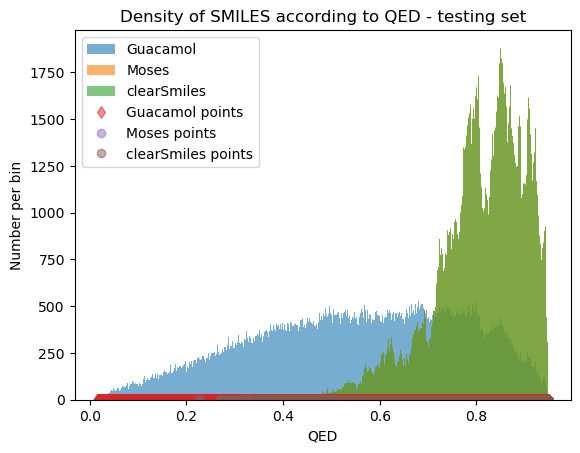

In [8]:
# Compute bins for both datasets
qed_max1 = dataset_guacamol_test["qed"].max()
qed_min1 = dataset_guacamol_test["qed"].min()
qed_max2 = dataset_moses_test["qed"].max()
qed_min2 = dataset_moses_test["qed"].min()
qed_max3 = clearSmiles_dataset["qed"].max()
qed_min3 = clearSmiles_dataset["qed"].min()

qed_min = min(min(qed_min1, qed_min2),qed_min3)
qed_max = max(max(qed_max1, qed_max2),qed_max3)

bin_width = (qed_max - qed_min) / n
x_bins = [qed_min + k * bin_width for k in range(n+1)]

# Create the plot
fig, ax = plt.subplots()

# Plot histograms
ax.hist(dataset_guacamol_test["qed"], bins=x_bins, alpha=0.6, label='Guacamol')
ax.hist(dataset_moses_test["qed"], bins=x_bins, alpha=0.6, label='Moses')
ax.hist(clearSmiles_dataset["qed"], bins=x_bins, alpha=0.6, label='clearSmiles')

# Optionally: overlay scatter points at y=0 for both datasets
ax.plot(dataset_guacamol_test["qed"], [0]*len(dataset_guacamol_test), 'd', label='Guacamol points', alpha=0.5)
ax.plot(dataset_moses_test["qed"], [0]*len(dataset_moses_test), 'o', label='Moses points', alpha=0.5)
ax.plot(clearSmiles_dataset["qed"], [0]*len(clearSmiles_dataset), 'o', label='clearSmiles points', alpha=0.5)


# Labels and title
ax.set_ylabel('Number per bin')
ax.set_xlabel('QED')
ax.set_title('Density of SMILES according to QED - testing set')
ax.legend()

plt.show()

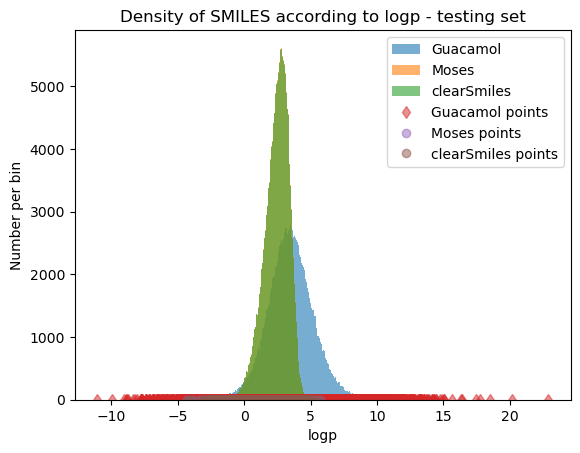

In [9]:

# Compute bins for both datasets
logp_max1 = dataset_guacamol_test["logP"].max()
logp_min1 = dataset_guacamol_test["logP"].min()
logp_max2 = dataset_moses_test["logP"].max()
logp_min2 = dataset_moses_test["logP"].min()
logp_max3 = clearSmiles_dataset["logP"].max()
logp_min3 = clearSmiles_dataset["logP"].min()



logp_min = min(min(logp_min1, logp_min2),logp_min3)
logp_max = max(max(logp_max1, logp_max2),logp_max3)

bin_width = (logp_max - logp_min) / n
x_bins = [logp_min + k * bin_width for k in range(n+1)]

# Create the plot
fig, ax = plt.subplots()

# Plot histograms
ax.hist(dataset_guacamol_test["logP"], bins=x_bins, alpha=0.6, label='Guacamol')
ax.hist(dataset_moses_test["logP"], bins=x_bins, alpha=0.6, label='Moses')
ax.hist(clearSmiles_dataset["logP"], bins=x_bins, alpha=0.6, label='clearSmiles')

# Optionally: overlay scatter points at y=0 for both datasets
ax.plot(dataset_guacamol_test["logP"], [0]*len(dataset_guacamol_test), 'd', label='Guacamol points', alpha=0.5)
ax.plot(dataset_moses_test["logP"], [0]*len(dataset_moses_test), 'o', label='Moses points', alpha=0.5)
ax.plot(clearSmiles_dataset["logP"], [0]*len(clearSmiles_dataset), 'o', label='clearSmiles points', alpha=0.5)
# Labels and title
ax.set_ylabel('Number per bin')
ax.set_xlabel('logp')
ax.set_title('Density of SMILES according to logp - testing set')
ax.legend()

plt.show()

Uniqueness


0.9999886087268544

In [16]:
print("Uniqueness of clearSmiles : " + str(len(set(clearSmiles_dataset["inchie"].to_list()))/len(clearSmiles_dataset["inchie"].to_list())))
print("Uniqueness of guacamol : " + str(len(set(dataset_guacamol_test["inchie"].to_list()))/len(dataset_guacamol_test["inchie"].to_list())))
print("Uniqueness of moses : " + str(len(set(dataset_moses_test["inchie"].to_list()))/len(dataset_moses_test["inchie"].to_list())))


Uniqueness of clearSmiles : 0.9999886087268544
Uniqueness of guacamol : 0.9999185111357667
Uniqueness of moses : 0.9999886411395209
